 # Основы статистики
 Полезные ссылки:
 - https://vavilovva.shinyapps.io/dist_calc/ - визуализирует и рассчитывает p (p-value)
 - 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1. Введение в статистику

### Меры центральной тенденции

Рассчет среднего, медианы и моды случайной выборки.
- с помощью библиотек numpy и stats:

In [4]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                   167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

mode, count =  stats.mode(sample)
print('count:', count)
print('mode:', mode)
print('median:', np.median(sample))
print('mean:', np.mean(sample))

count: 4
mode: 172
median: 170.5
mean: 170.4


 - с помощью библиотеки pandas:

In [6]:
sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                    167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


### Меры изменчивости

Рассчет размаха и стандартного отклонения выборки.

In [7]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                   167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print(f'Размах: {np.ptp(sample)} проверка по разнице max-min: {np.max(sample)- np.min(sample)}')

print(f'Standard deviation: {np.std(sample, ddof=1):.2f}')

Размах: 28 проверка по разнице max-min: 28
Standard deviation: 6.00


Создание диаграммы boxplot по этим данным:

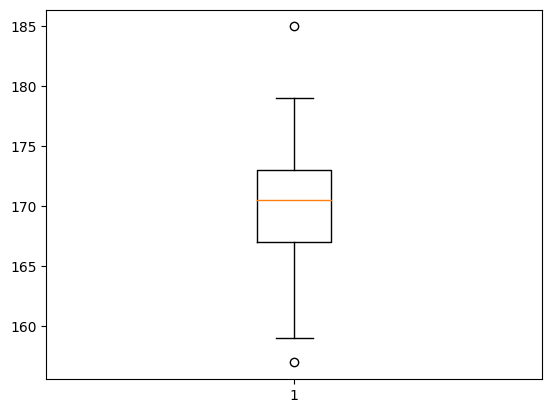

In [8]:
plt.boxplot(sample, showfliers=1)
plt.show()

По диаграмме boxplot мы можем узнать медиану выборки(выборок), размер 2 и 3 квартильи, существуют ли выбросы, которые выходят за их границы.

## Нормальное распределение

Иммитация доски Гальдота с помощью seaborn:

*при каждом новом запуске программы распределение будет немного меняться, но в итоге будет сильно приближенно  к нормальному (наиболее сильны различия при маленьких N).*

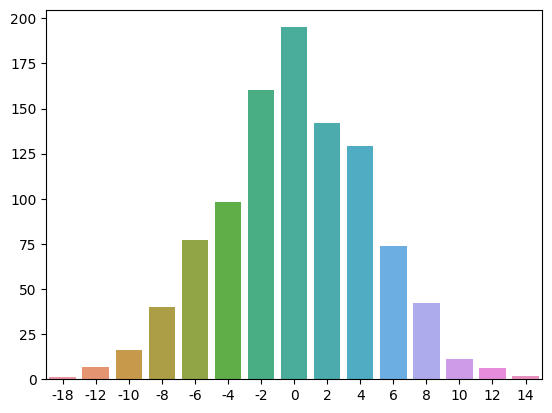

In [12]:
data = dict()
# количество шариков
N = 1000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

Решение задачи:

**Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ > 125?**

In [13]:
mean = 100
std = 15
IQ = 125
# sf - Survival function = (1 - cdf) - Cumulative distribution function
print(f"Только у {(stats.norm(mean, std).sf(IQ))*100:.2f}% людей, IQ>{IQ}")

Только у 4.78% людей, IQ>125


### Z-преобразование:

Решение задачи:

**Допустим, мы измерили рост 1000 человек, данное распределение оказалось нормальным со средним равным 175 и стандартным отклонением равным 8 (M = 175, sd = 8). Рост одного из испытуемых составил 186,2. Чему равняется z - значение, рассчитанное для этого испытуемого?**

In [22]:
N = 1000
M = 175
sd = 8

h = 186.2

print('Z-значение будет равно', '{0:.2f}'.format((h-M)/sd))

Z-значение будет равно 1.40


Решение задачи:

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

**Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?**

In [24]:
M = 100
sd = 15

z1 = (112-100)/sd
z2 = (70-100)/sd

print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(z1) - stats.norm.cdf(z2)):.2%} значений')
                                                # показывает сколько значений в заданном промежутке

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


### Центральная предельная теорема

Гласит, что множество средних выборок из генеральной совокупности (ГС необязательно иметь нормальное распределние) будут иметь нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет називаться **стандарной ошибкой среднего** (se).

Пример реализации теоремы:

<Axes: ylabel='Frequency'>

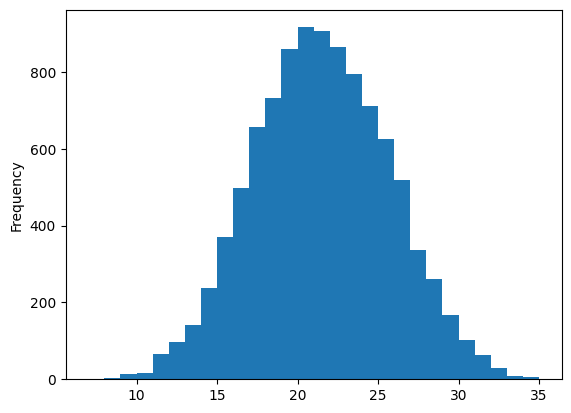

In [25]:
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер генеральной совокупность
sp_size = 10000
# sp - Statistical population - генеральная совокупность
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

sp.plot.hist(bins=28)

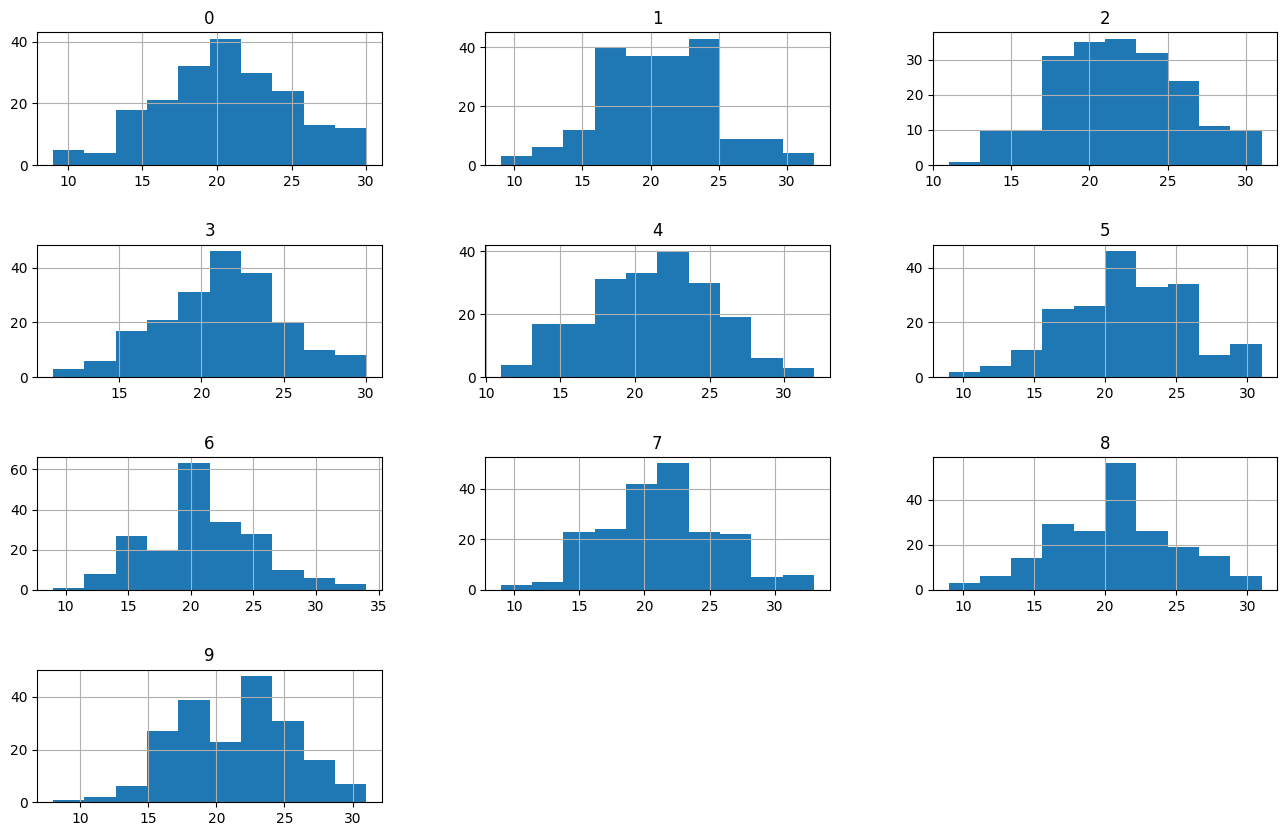

In [29]:
# количество выборок
samples_count = 10
# размер выборки
sample_size = 200
samples = pd.DataFrame([
    [np.random.choice(sp) for _ in range(sample_size)] for _ in range(samples_count)
]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [30]:
means = samples.mean()
print('Сравним среднию ГС и среднию средних выборок', sp.mean(), means.mean())
print('Разница средних:', abs(means.mean() - sp.mean()), ', Стандартная ошибка среднего:', means.std())

Сравним среднию ГС и среднию средних выборок 20.9969 21.031000000000002
Разница средних: 0.03410000000000224 , Стандартная ошибка среднего: 0.36088471535627237


Берем произвольную выборку:

In [32]:
import math

sample = samples[0]
print('sample mean:', sample.mean())
print('sample SE: ', sample.std()/math.sqrt(sample.size))

sample mean: 20.495
sample SE:  0.2981515499434278


Пример

**Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100.**

In [36]:
M = 10
D = 4
N = 100

sd = sqrt(D)
print('SE равен', sd/sqrt(N))

SE равен 0.2


### Доверительные интервалы среднего

Расчет 1.96σ:

In [33]:
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


Пример:

**Рассчитайте 99% доверительный интервал** для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100

In [35]:
from math import sqrt

p = 0.99
mean = 10
std = 5
n = 100

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


Использование доверительных интервалов зачастую рассматривают, как альтернативный способ проверки гипотез. В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, у нас будет достаточно оснований отклонить нулевую гипотезу. 

**Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.**

n = 64,  sd = 4,   M = 18.5

In [37]:
std = 4
n = 64
mean = 18.5

left = mean - 1.96 * (std / n ** 0.5)
right = mean + 1.96 * (std / n ** 0.5)
print([left, right])



[17.52, 19.48]


Так как 20 у нас не принадлежит доверительному интервалу, то мы отклоняем нулевую гипотезу.

Задача:

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. 
**Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.**

In [43]:
sd = 9
n = 144
mean = 118
M = 115

se = sd/sqrt(n)
z_scores = (mean-M)/se
print('z=', z_scores)

p_values = stats.norm.sf(abs(z_scores)) #one-sided
p_values2 = stats.norm.sf(abs(z_scores))*2 #two-sided
print("%.20f" % p_values)
print("%.20f" % p_values2)

z= 4.0
0.00003167124183311986
0.00006334248366623973


# Часть 2

## T-распределение (Распределение Стьюдента)

График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.

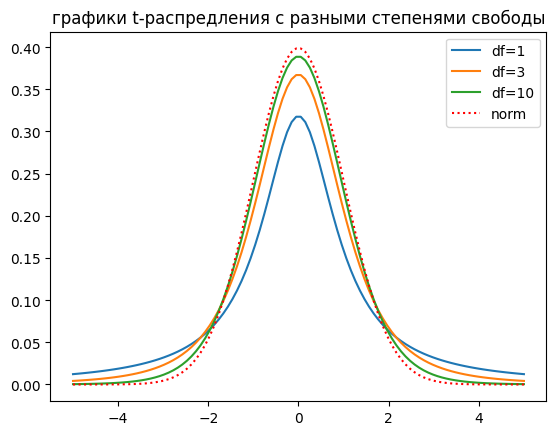

In [45]:
from scipy.stats import t, norm

x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

Решение задачи:

**На выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: μ=10 и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости (двусторонний) равен:**

In [46]:
t = -2
n = 15
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print(f'p = {p:.3f}')

p = 0.065


## Сравнение двух средних

Пример реализации: 

In [50]:
from scipy.stats import t, norm

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка_1':array1, 'Выборка_2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['Интервал'] = K * df['SE']

df

,Mx,SD,N,SE,Интервал
Выборка_1,100.815,10.246503,20.0,2.291188,4.545754
Выборка_2,75.735,15.458102,20.0,3.456537,6.886174


Строим графики для наглядного представления данных, boxplot из изначальных array1, array2, доверительные интервалы из датафрейма df.

C:\Users\admin\AppData\Local\Temp\ipykernel_4216\1268559234.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['Интервал'],\


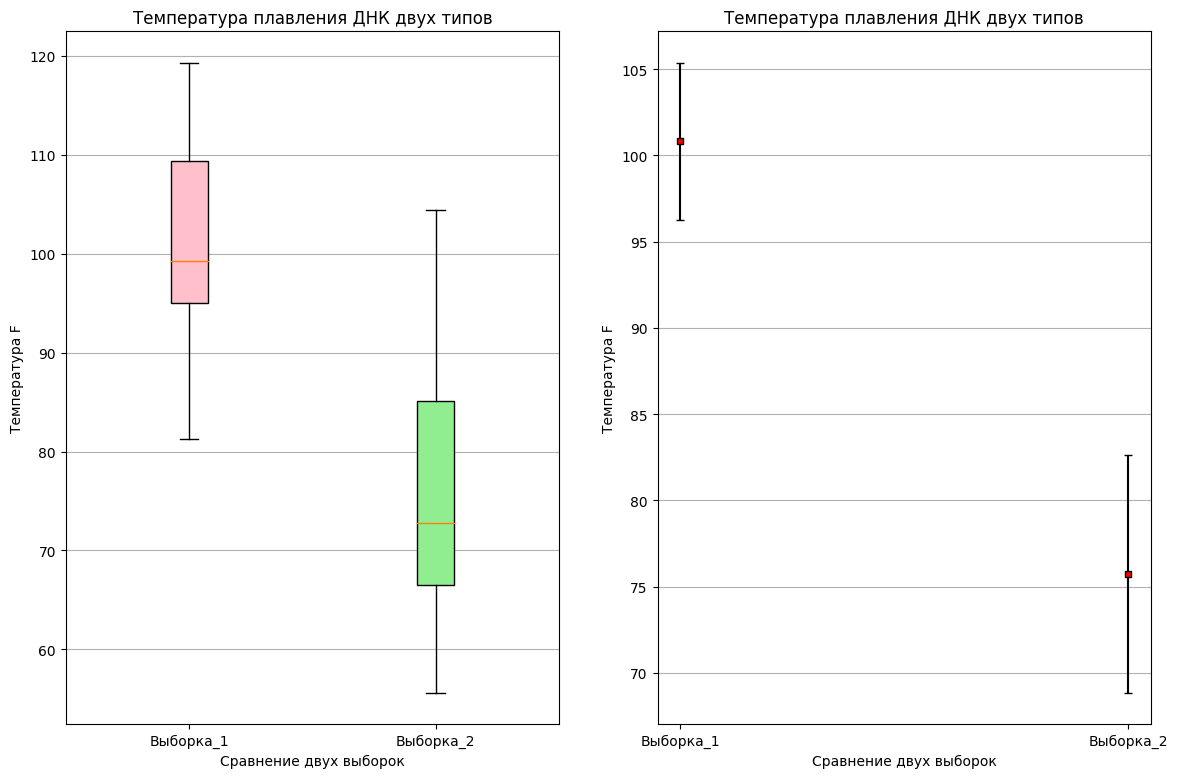

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка_1', 'Выборка_2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['Интервал'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

По данным графикам мы можем сказать, что средние значения выборок сильно отличаются, так как среднее значение второй выборки не входит в доверительный интервал первой выборки, так же можно сказать, что в обоих выборках нет сильных выбросов значений.

Задача 1:

**Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:**

X=89,9 sd=11,3 n=20

In [54]:
mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


Задача 2:

**Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами статистически достоверными.**

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

In [56]:
mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100

se = sqrt((sd_m ** 2)/N + (sd_f ** 2)/N)
t_value = (mean_m - mean_f)/se

p = t.sf(t_value, N-2)

print(f'p = {p}')

if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p = 5.328933875539173e-13
Мы можем отклонить нулевую гипотезу


Нулевая гипотеза в данной задаче - что средние в генеральной совокупности равны (их разница будет равняться 0).

## Проверка распеределения на нормальность

### QQ-plot

Показывает на сколько наши выборочные значения хорошо соответствуют предсказанным значениям, то есть значениям которые были бы будь наше распределение идеально номальным.
Применяется когда в выборке мало наблюдений.

Пример реализации:

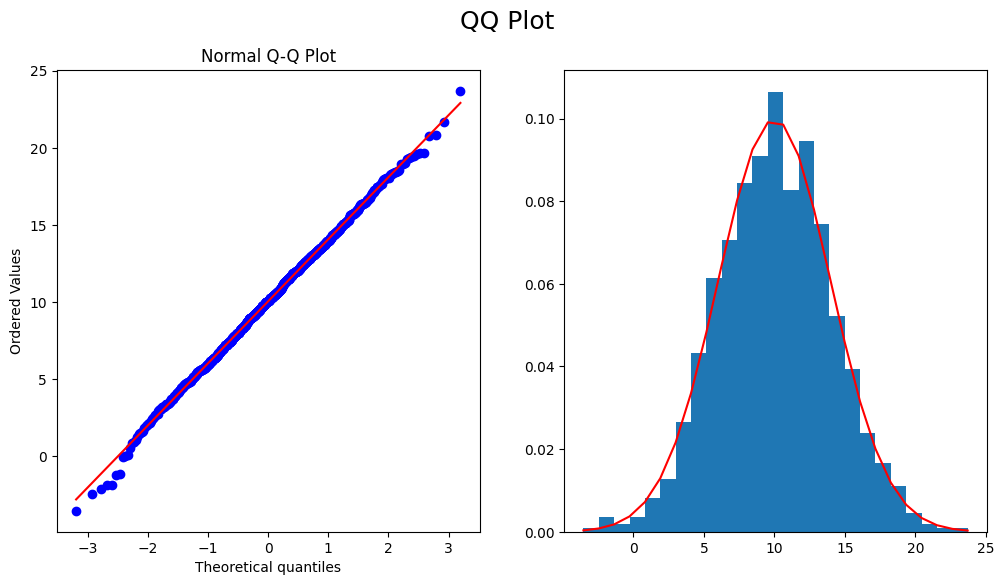

In [57]:
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')
 

plt.show()

### Однофакторный дисперсионный анализ

Задача из курса с генотерапией решена отдельно файлы:  
 - genetherapy.csv - исходный набор данных
 - One-way_ANOVA.py - реализация программы с графиками, созданием датафрейма и расчетами с помощью библиотеки spicy.
 - BoxPlot.pdf - график Boxplot, сохраненный в формате pdf.

Пример реализации однофакторного анализа (задача из видео):


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


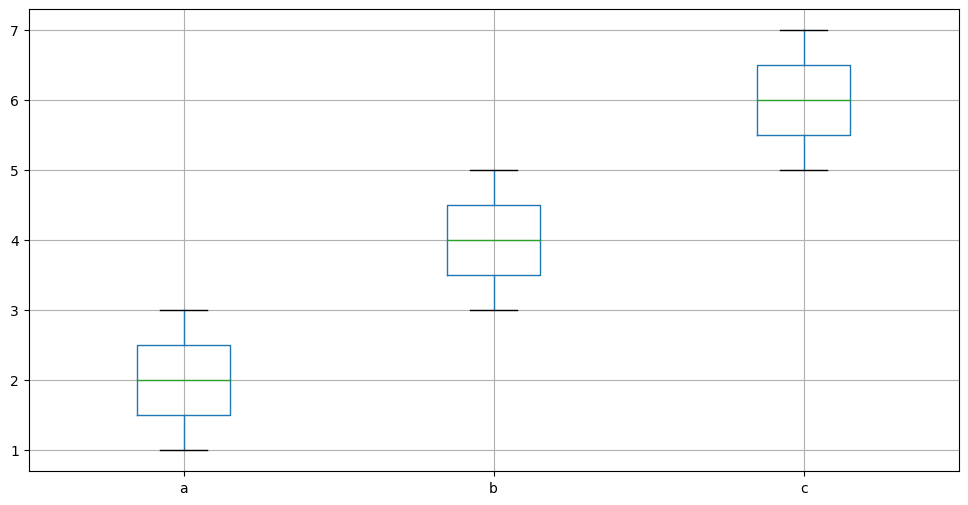

In [60]:
# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')